In [50]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
matrix = []
block_unblock_matrix = []

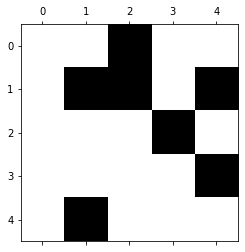

In [59]:
def populateMatrix(n,p):
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array
    
np_array = populateMatrix(5,0.3)
block_unblock_matrix = np.asmatrix(np_array)

plt.spy(block_unblock_matrix)

In [60]:
costTable = {(0,0):0}
parentTable = {}
fringe = {(0,0):0}   #{(x,y): cost}
visited = {}         #change datatype if necessary
parent = (0,0)       #global parent variable
goal= (n-1,n-1)

""" ignore this block
def indexToCoordinates(c):
    if c==0:
        return (0,0)
    x=int(c/n)
    y=c%n
    return (x,y)
    
def coordinatesToIndex(x,y):
    return n*x+y
"""
    
# indexToCoordinates(8)
# print(coordinatesToIndex(1,1))+3

In [ ]:
def setCostAndParentOf(nodes):
    for x in nodes:
        if costTable.has_key(x):                    #if x is already present in costTable
            if costTable[x] > costTable[parent] +1: #if x's cost > new calculated cost for x, i.e. if we got a better cost for x, update its parent,cost to new values
                parentTable[x] = parent    #this is global parent variable
                costTable[x] = costTable[parent] +1
        else:                                       #if x is not present in costTable. i.e., if we don't have any cost for x yet.
            parentTable[x] = parent                 #this is global parent variable
            costTable[x] = costTable[parent] +1 

In [ ]:
def pushToFringe(nodes):
    for x in nodes:
        if fringe.has_key(x):
            if fringe[x] > costTable[x]:       #if we have better cost for x than what is already in fringe
                fringe[x] = costTable[x]       #update x's value in fringe to new(lower) cost
        else:                                  #if fringe doesn't have x in it yet
            fringe[x] = costTable[x]           #add x to fringe

In [ ]:
""" Ignore this
def updateParentOf(node):
    parentTable[node] = parent
"""

In [61]:
def addToVisitedNodes(node):
    visited[node] = True

In [63]:
def Astar():
    global fringe
    global parent
    while bool(fringe):
        fringe = dict(sorted(fringe.items(), key=lambda item: item[1]))
        currentNode = next(iter(fringe))
        currentNodeCost = fringe[currentNode]
        del fringe[currentNode]
#         print(currentNode,currentNodeCost)
#         if currentNode != (0,0):             # do not delete this line
#     #         print("for node ",currentNode) # do not delete this line
#             updateParentOf(currentNode)      # do not delete this line
#             updateCostOf(currentNode,currentNodeCost) # do not delete this line
        addToVisitedNodes(currentNode)
        print(visited)
        computeHOfN(currentNode,heuristicType)  #no need to calculate g(n) because it is there in costTable[n]
        computeFOfN(currentNode)
        if currentNode == goal:
            print("path found")
            return findPathToSourceFrom(currentNode)
        parent = currentNode                    #update global parent variable to currentNode (to set parent for its children in next step)
        children = generateValidChildren(currentNode)
        setCostAndParentOf(children)
        pushToFringe(children)
    print("Couldn't find path to Goal")
    return -1 #change datatype if necessary

Astar()

(0, 0) 0
{(0, 0): True}


NameError: name 'computeHOfN' is not defined